In [7]:
import numpy as np
import pandas as pd
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## **Problem Statement:**

* About Company: Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

## **Problem**

* The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically.

## **Loading Data**

In [8]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
train_df = pd.read_csv('F:\Learning\Home loan approval\Data\loan_sanction_train.csv')

In [9]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Taking a look at the data**

In [10]:
print(train_df.shape)

(614, 13)


In [11]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**As seen in the above code cell, there are many null values. So, now lets handle these null values.**
1. **Gender column** : Since there are 14 null values, these rows can just be removed from the dataset as the training dataset is already very large. Also here we cannot assume ones gender in order to fill that space hence, we just need to delete these rows.

2. **Dependents** : Since it is a categorical data with 0 for no dependents, thus here one assumption can be made that if the value is null then there are no dependents and hence, the space can be filled with 0.

3. **Married** : Here also as the number of null values are very low we can just eradicate these rows and assume that the dataset would be fine.

4. **Self-Employed** : Again, it is a categorical data with yes and no as categories, instead of deleting them altogether an assumption can be made that if null is there then that means the applicant isn't self empoyed, thus fill 'no'.

5. **LoanAmount** :  In this columns, there ar only numerical values, thus here if loan amount isn't provided a median of all the values can be filled in the null positions.

6. **LoanAmountTerm** : Here as it is again a numerical data, we can fill this with the mean of all the values.

7. **Credit_History** : Again repeat the procedure done in the self-employed column.

In [13]:
#gender column
train_df = train_df[train_df['Gender'].notna()]

In [14]:
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#dependents column
train_df['Dependents'] = train_df['Dependents'].fillna('0')
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#Married column
train_df = train_df[train_df['Married'].notna()]
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#Self_employed column
train_df['Self_Employed'] = train_df['Self_Employed'].fillna('No')
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#Loan amount column
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
#Loan amount term column
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].min())
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#credit history column
train_df['Credit_History'] = train_df['Credit_History'].fillna(0)

In [21]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
train_df.shape

(598, 13)

**Now that all the null values are succesfully removed, lets have a look at the columns individually.**

In [23]:
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
train_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [26]:
train_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [27]:
train_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
train_df['Credit_History'].unique()

array([1., 0.])

In [29]:
train_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
train_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

**Here the dependents column,firstly instead of having int values has string values and also there is a category 3+ which can be removed and inplace 3 can be used.**

In [31]:
def chng_three(d):
    if d == '3+':
        d = '3'
    return int(d)
train_df['Dependents'] = train_df['Dependents'].apply(chng_three)

In [32]:
train_df['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

**Credit History column values can be changed to int.**

In [33]:
train_df['Credit_History'] = train_df['Credit_History'].astype(int)
train_df['Credit_History'].dtype

dtype('int32')

In [34]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


## **Exploratory Data Analysis**

### **Univariate Analysis**
1. First, let's have a look at CATEGORICAL data.
2. Then we can move on to NUMERICAL data.

#### **Categorical Data**

<Axes: xlabel='Gender', ylabel='count'>

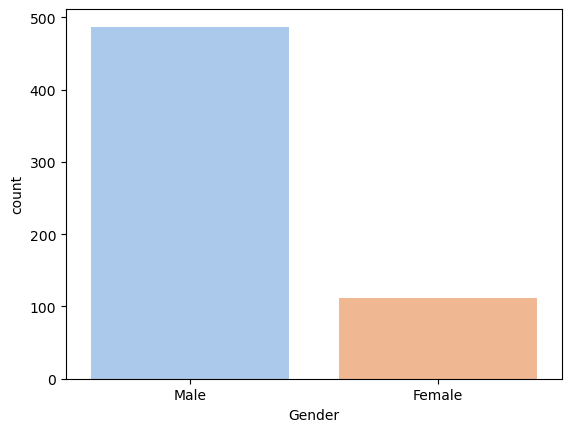

In [36]:
#Gender column

import seaborn as sns
sns.countplot(x=train_df['Gender'],palette=sns.color_palette('pastel'))

> ***Note:*** *Here we see the number of male applicants is way more than number of female applicants*

<Axes: ylabel='Married'>

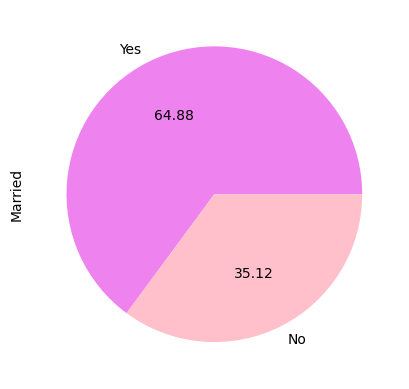

In [37]:
#Married column
train_df['Married'].value_counts().plot(kind='pie',autopct='%.2f',colors=['violet','pink'])

***Note***: *Here we see the number of most of the applicants are married and that most of the applicants are male*

<Axes: ylabel='Dependents'>

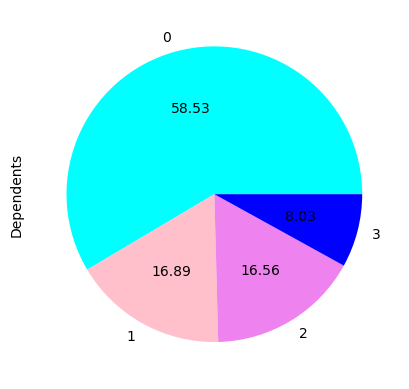

In [38]:
#Dependents column
train_df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f',colors=['cyan','pink','violet','blue'])

<Axes: xlabel='Education', ylabel='count'>

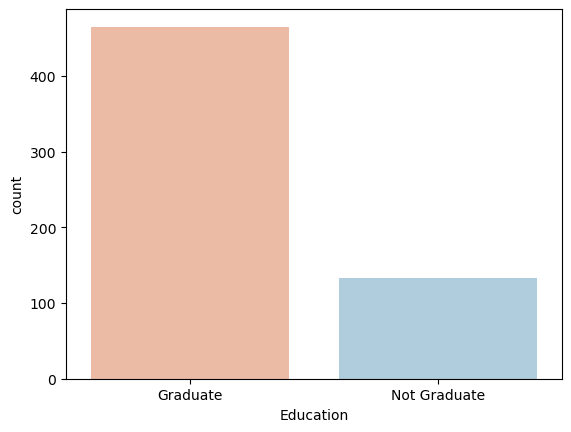

In [40]:
#Education column
sns.countplot(x=train_df['Education'],palette='RdBu')

<Axes: ylabel='Self_Employed'>

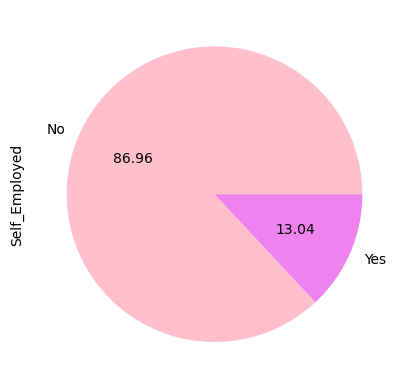

In [41]:
#Self employed column
train_df['Self_Employed'].value_counts().plot(kind = 'pie',autopct = '%.2f',colors=['pink','violet'])

<Axes: xlabel='Credit_History', ylabel='count'>

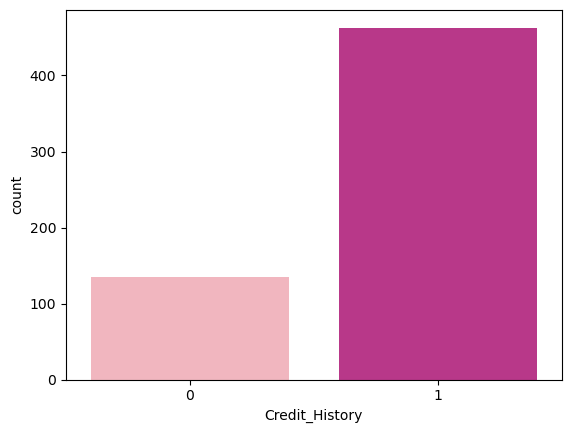

In [45]:
#Credit history column
sns.countplot(x=train_df['Credit_History'],palette='RdPu')

<Axes: ylabel='Property_Area'>

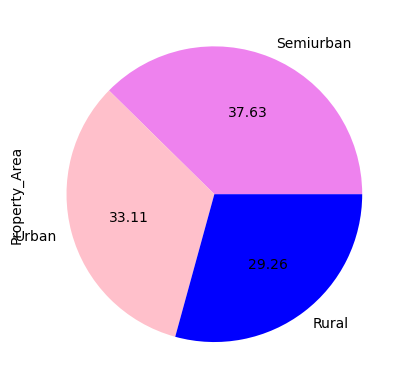

In [43]:
#Property area column
train_df['Property_Area'].value_counts().plot(kind = 'pie',autopct = '%.2f',colors=['violet','pink','blue'])

<Axes: xlabel='Loan_Status', ylabel='count'>

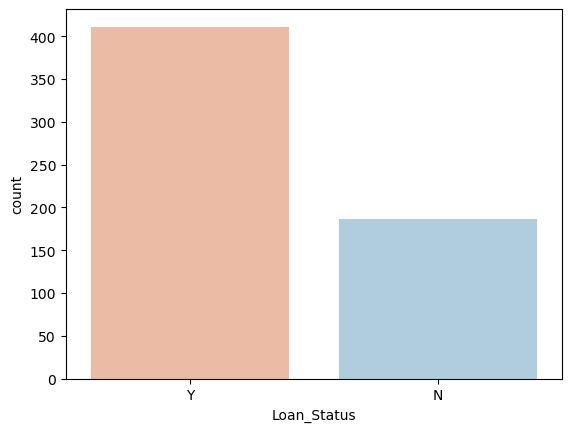

In [46]:
#Loan status column
sns.countplot(x=train_df['Loan_Status'],palette='RdBu')

***Now looking at all the categorical data in relation with Loan status column***

In [47]:
cols = train_df.columns

num_cols = train_df._get_numeric_data().columns

category = list(set(cols) - set(num_cols))
i=category.index('Loan_ID')
category.pop(i)
j = category.index('Loan_Status')
category.pop(j)
category.extend(['Dependents','Credit_History','Loan_Amount_Term'])
print(category)

['Education', 'Self_Employed', 'Gender', 'Married', 'Property_Area', 'Dependents', 'Credit_History', 'Loan_Amount_Term']


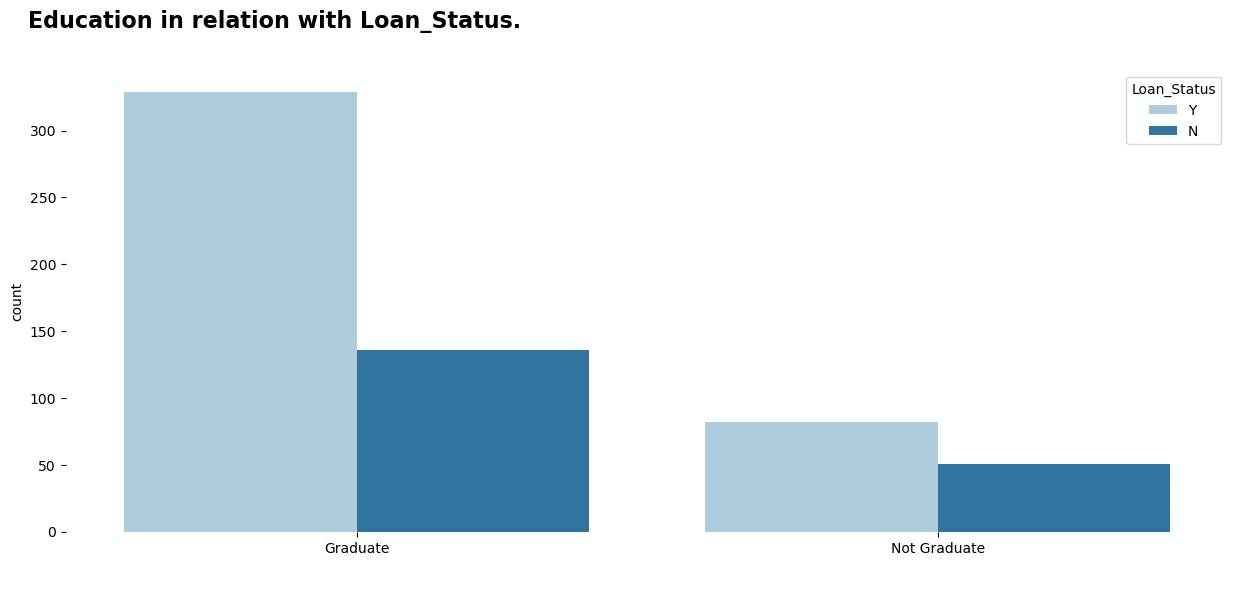

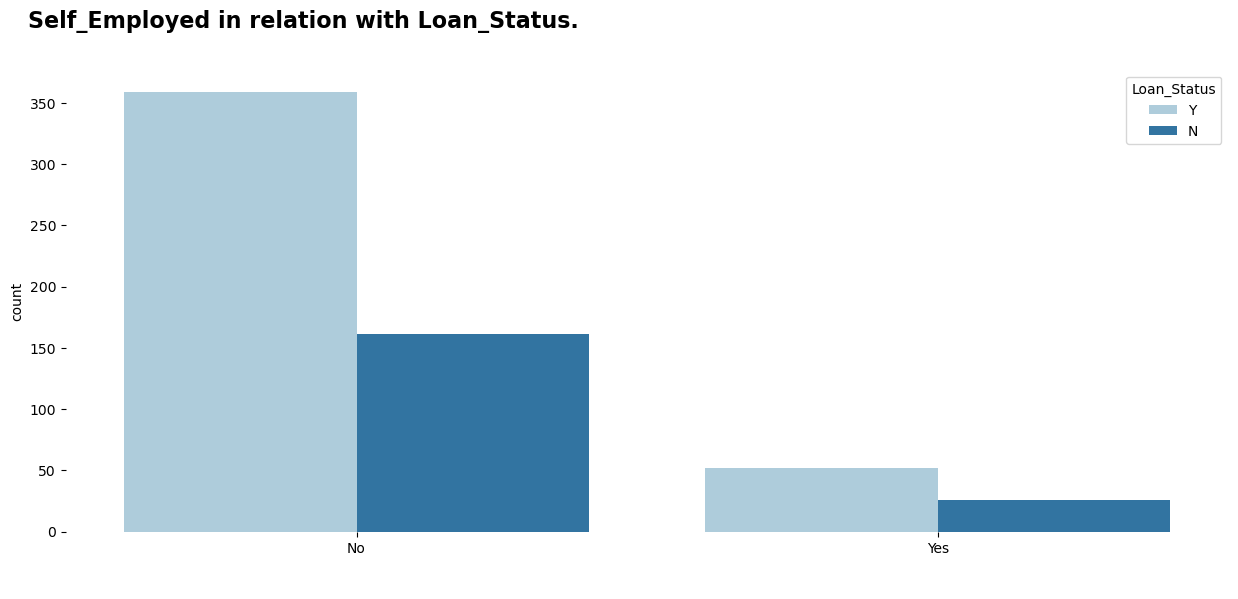

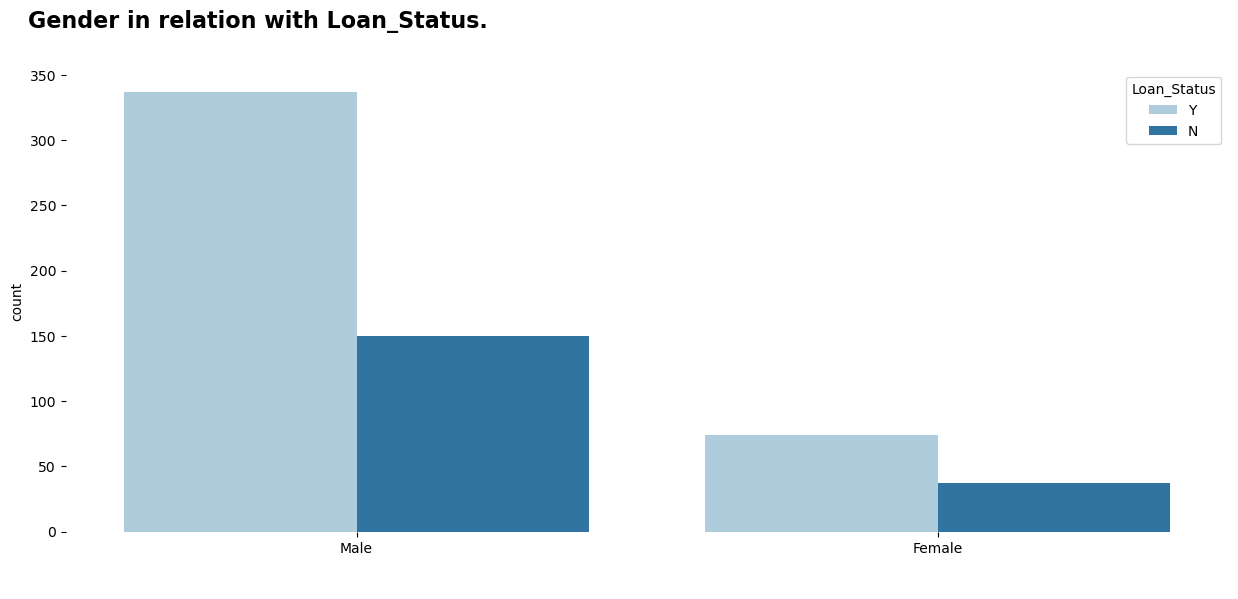

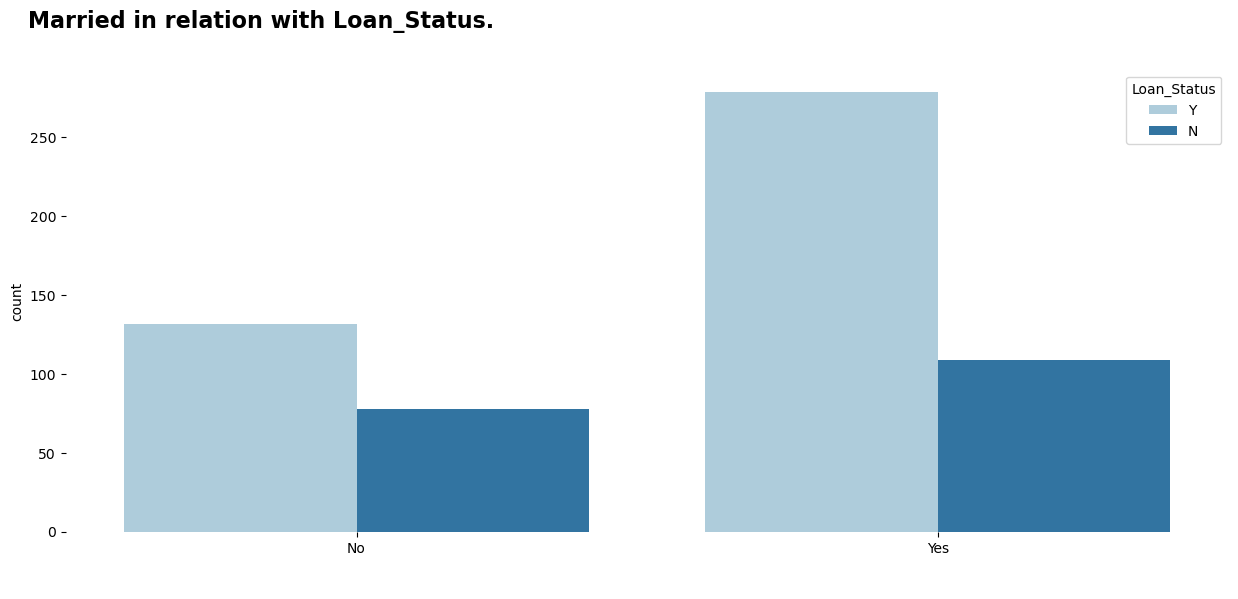

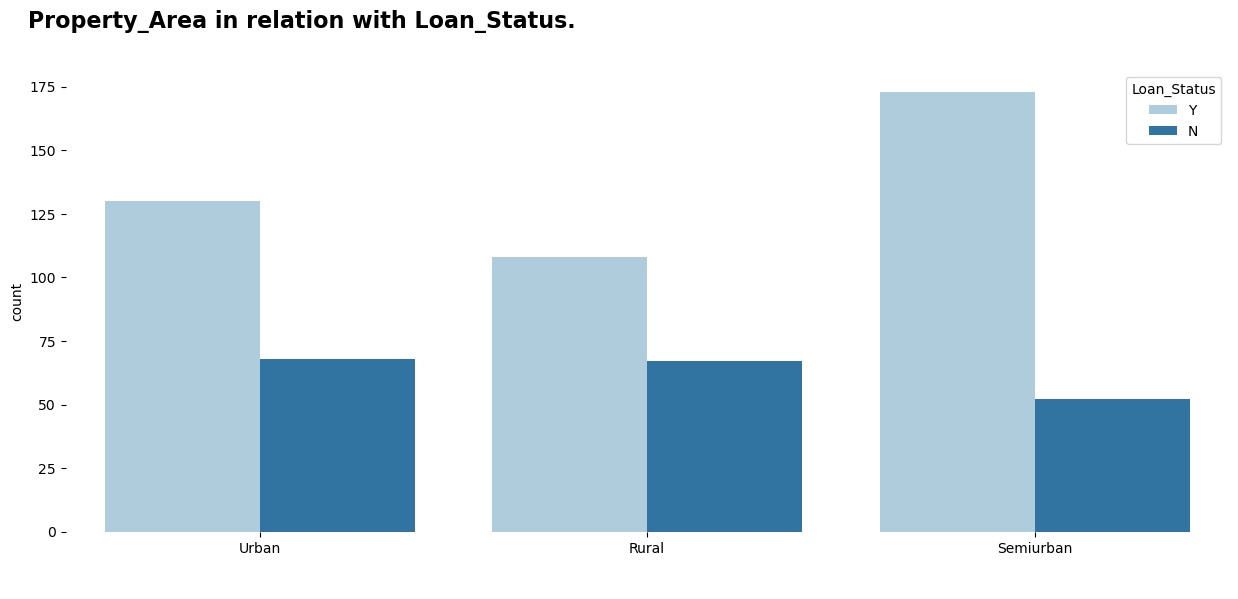

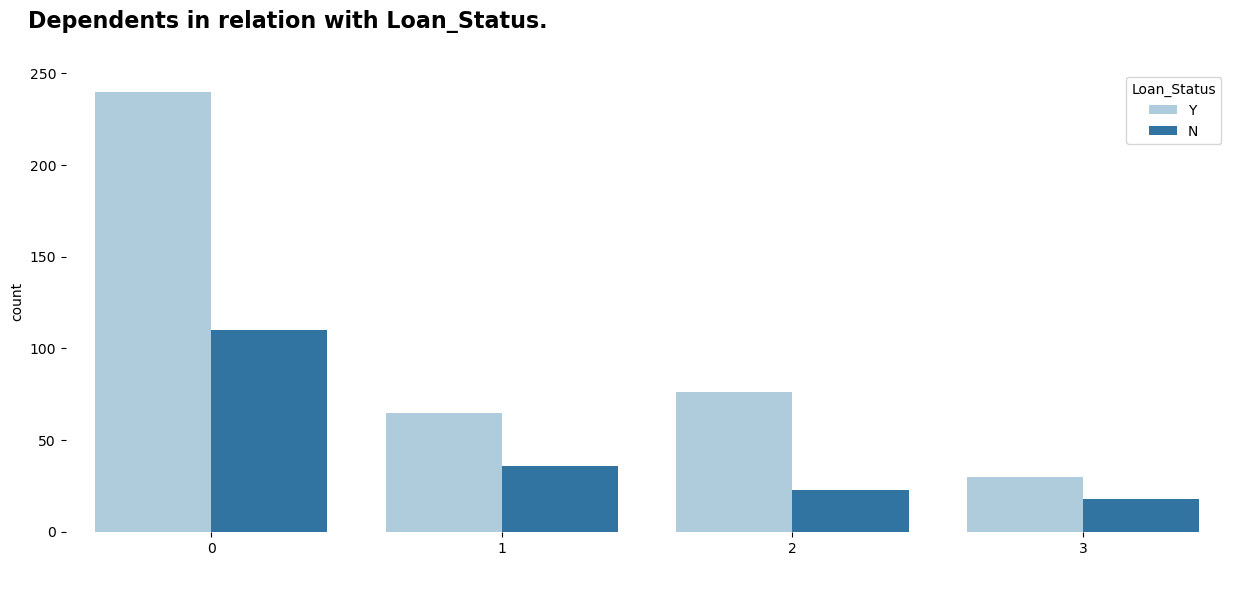

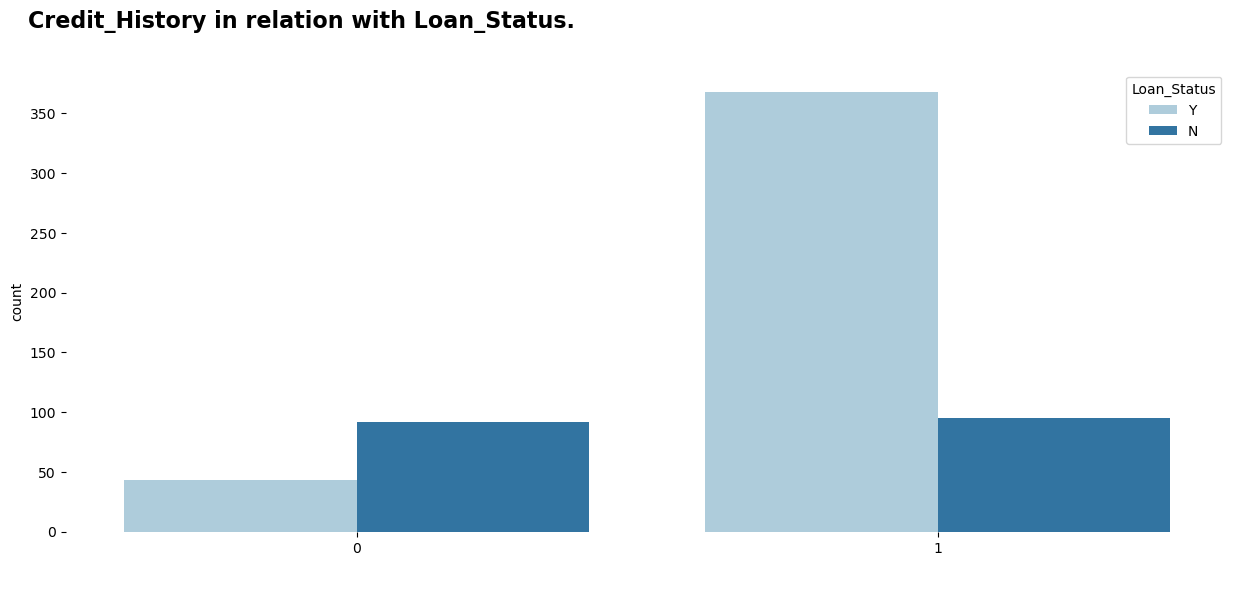

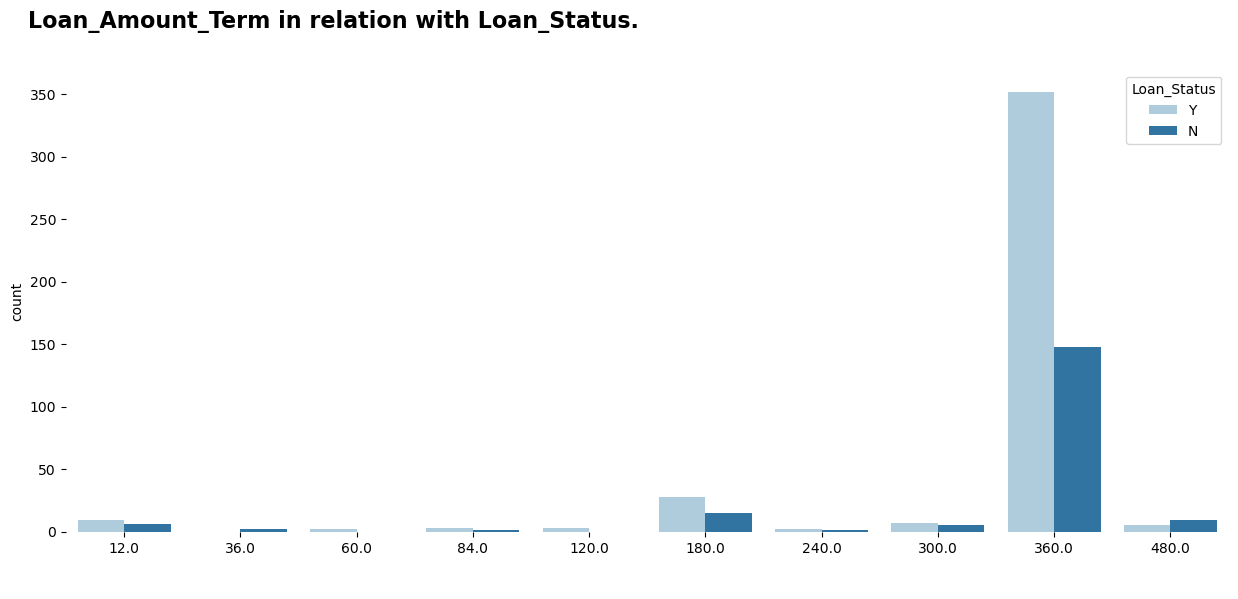

In [48]:
import matplotlib.pyplot as plt
for c in category:
    fig,ax = plt.subplots(1,1,figsize=(15,6))
    sns.countplot(x=train_df[c],hue = train_df['Loan_Status'],palette='Paired')
    fig.text(0.1,0.95,f"{c} in relation with Loan_Status.",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

#### **Numerical Data**

In [49]:
num = list(num_cols)
num.pop()
print(num)
num.pop(0)
num.pop()
print(num)

['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


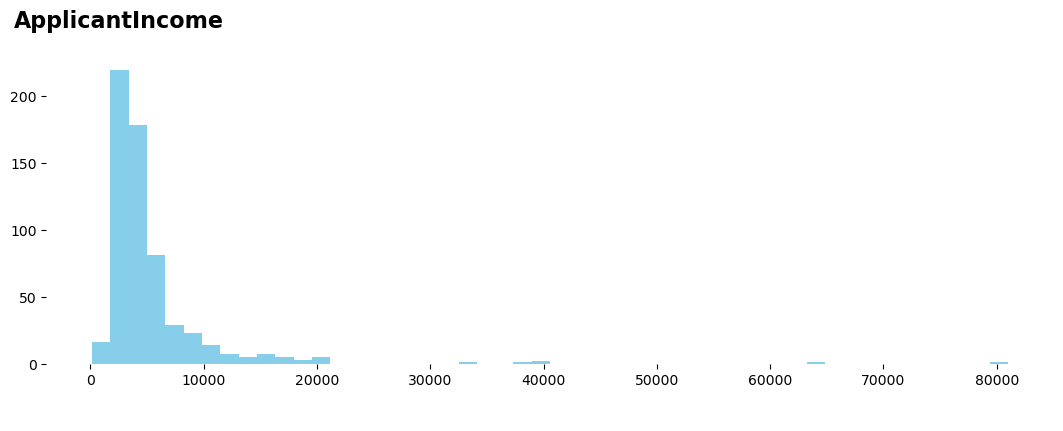

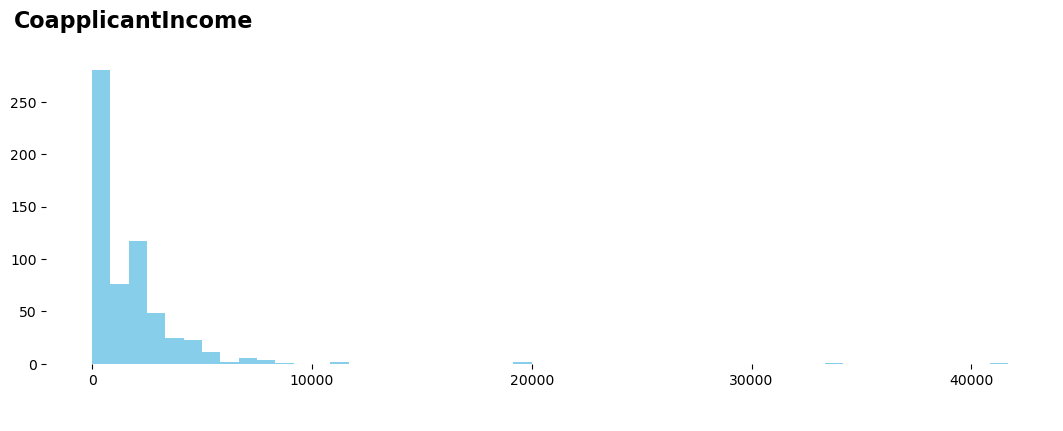

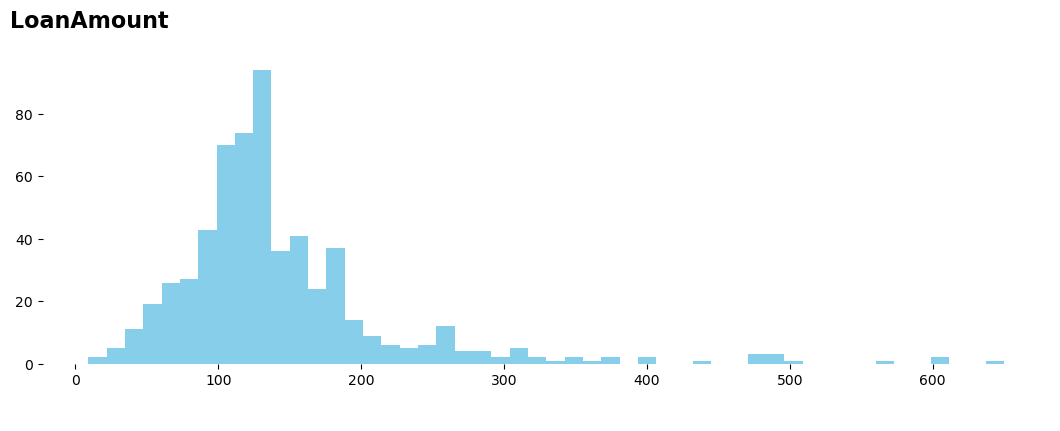

In [50]:
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    plt.hist(train_df[n],color='skyblue',bins=50)
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

C:\Users\abc\AppData\Local\Temp\ipykernel_8968\3868673359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[n],color='skyblue',bins=50)
C:\Users\abc\AppData\Local\Temp\ipykernel_8968\3868673359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[n],color='skyblue',bins=50)
C:

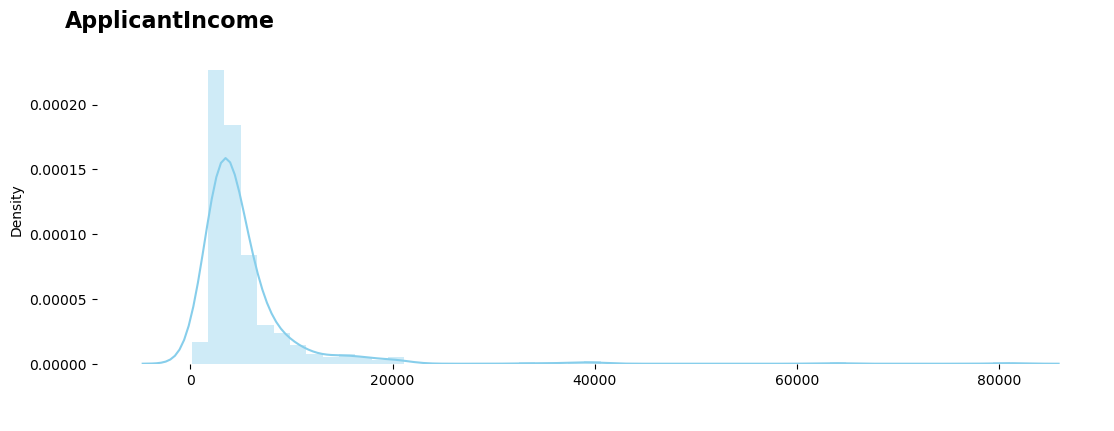

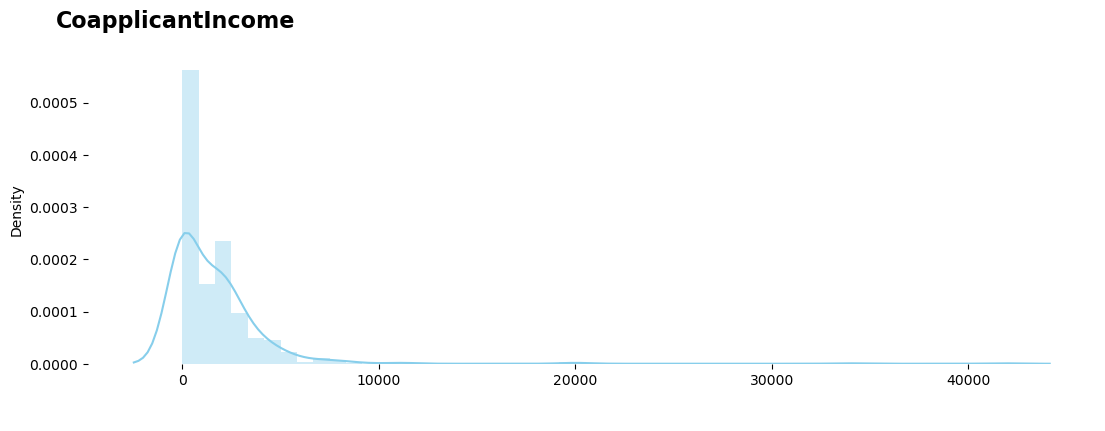

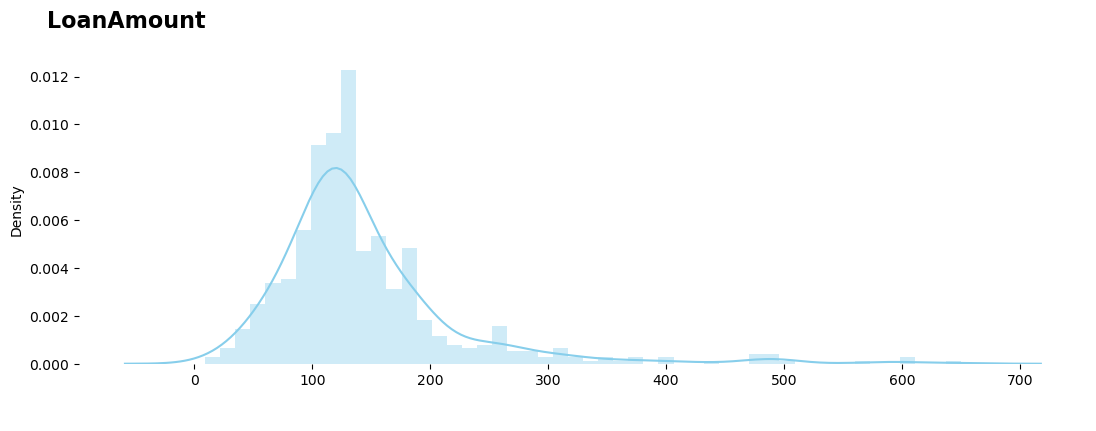

In [51]:
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(13,4))
    sns.distplot(train_df[n],color='skyblue',bins=50)
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

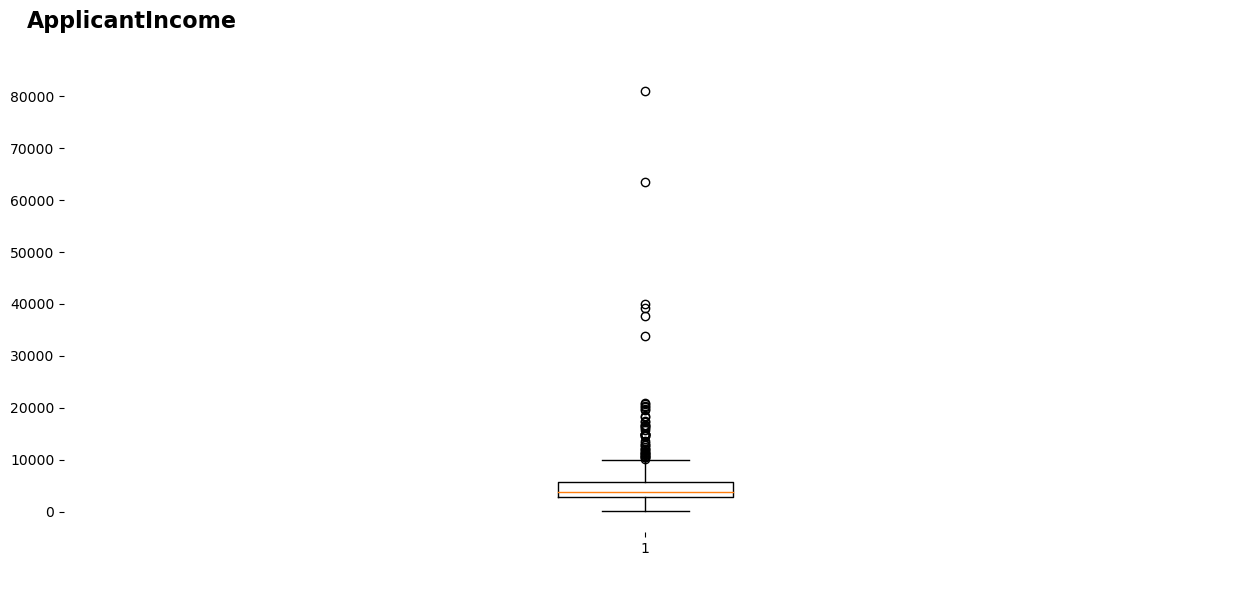

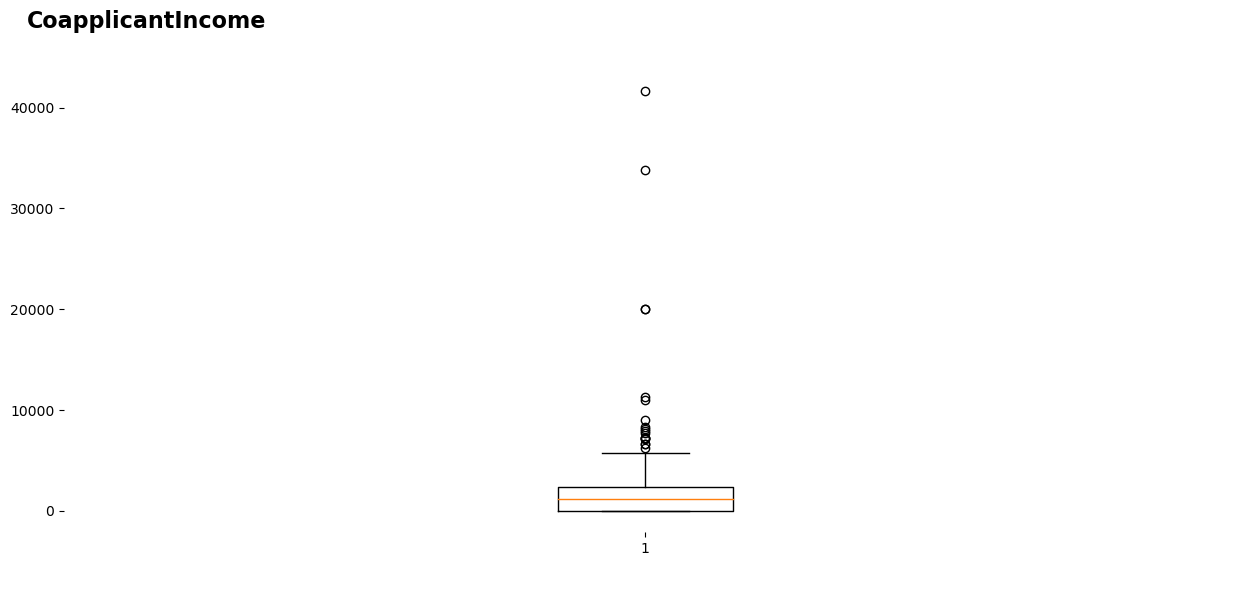

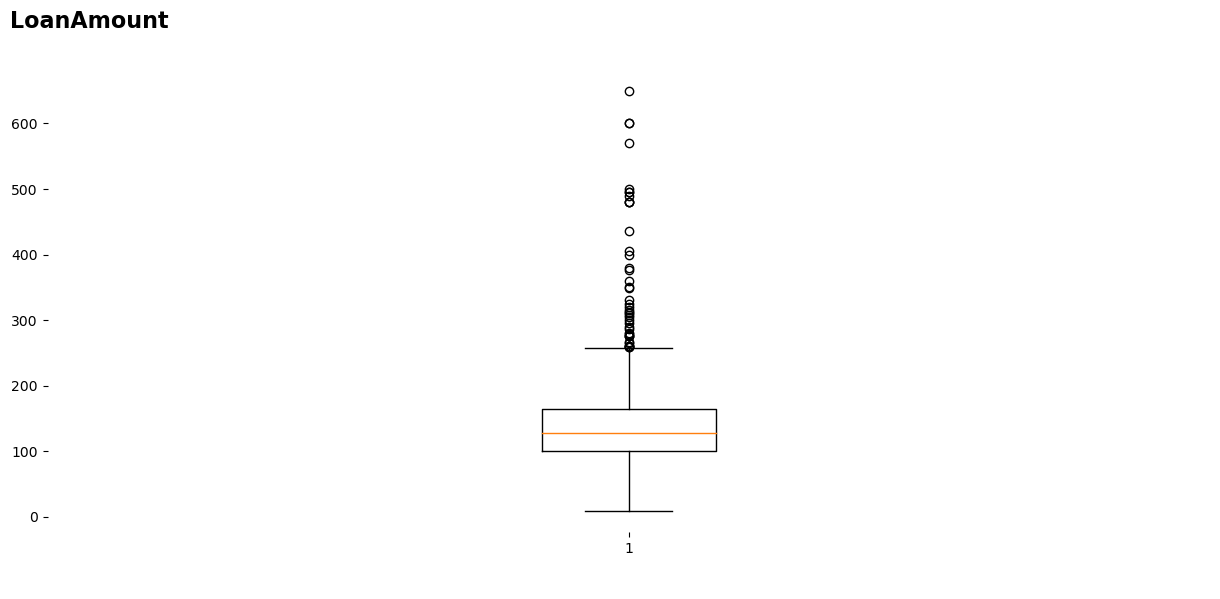

In [52]:
for n in num:
    fig,ax = plt.subplots(1,1,figsize=(15,6))
    plt.boxplot(train_df[n])
    fig.text(0.1,0.95,f"{n}",fontsize=16,fontweight='bold',fontfamily='sans serif')
    plt.xlabel(" ",fontsize=20)
    plt.ylabel=("")
    plt.box(False)

**As indicated by the box plot there are many outliers that can deteriorate the model. Thus they need to be handled.**

In [53]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


*But first let us have a look at correlations between columns*

In [54]:
train_df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.084744,0.036101,0.131133,-0.036459,-0.015928
ApplicantIncome,0.084744,1.000000,-0.109235,0.524426,-0.008957,-0.009831
CoapplicantIncome,0.036101,-0.109235,1.000000,0.207458,-0.050797,-0.053124
LoanAmount,0.131133,0.524426,0.207458,1.000000,0.071119,-0.047927
Loan_Amount_Term,-0.036459,-0.008957,-0.050797,0.071119,1.000000,0.053440
Credit_History,-0.015928,-0.009831,-0.053124,-0.047927,0.053440,1.000000


In [55]:
train_df[train_df['ApplicantIncome']<train_df['CoapplicantIncome']]['Loan_Status'].value_counts()

Y    44
N    26
Name: Loan_Status, dtype: int64

##### **A little bit of feature engineering**

In [56]:
train_df.replace({'Yes':1,'No':0},inplace = True)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,0,5849,0.0,127.0,360.0,1,Urban,Y
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,Y


In [57]:
train_df.replace({'Y':1,'N':0},inplace = True)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,Graduate,0,5849,0.0,127.0,360.0,1,Urban,1
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,1


In [58]:
dummy = pd.get_dummies(train_df['Gender'],prefix='Gender',drop_first=True)
train_df.drop('Gender',axis=1,inplace=True)
train_df = pd.concat([train_df,dummy],axis=1)
train_df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,0,0,Graduate,0,5849,0.0,127.0,360.0,1,Urban,1,1
1,LP001003,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,0,1
2,LP001005,1,0,Graduate,1,3000,0.0,66.0,360.0,1,Urban,1,1
3,LP001006,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,1,1
4,LP001008,0,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,1,1


In [59]:
train_df.drop('Loan_ID',axis=1,inplace=True)
train_df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0,0,Graduate,0,5849,0.0,127.0,360.0,1,Urban,1,1
1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,0,1
2,1,0,Graduate,1,3000,0.0,66.0,360.0,1,Urban,1,1
3,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,1,1
4,0,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,1,1


**Now its time to handle THE OUTLIERS**

In [60]:
#Applicant income column
train_df[train_df['ApplicantIncome']>50000]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
333,1,0,Graduate,0,63337,0.0,490.0,180.0,1,Urban,1,1
409,1,3,Graduate,0,81000,0.0,360.0,360.0,0,Rural,0,1


In [61]:
train_df = train_df[train_df['ApplicantIncome']<50000]
train_df.shape

(596, 12)

In [62]:
train_df[train_df['ApplicantIncome']>50000]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male


In [63]:
#Coapplicant income
train_df[train_df['CoapplicantIncome']>=20000]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
402,0,0,Graduate,0,2500,20000.0,103.0,360.0,1,Semiurban,1,1
417,1,2,Graduate,1,1600,20000.0,239.0,360.0,1,Urban,0,1
581,0,0,Graduate,0,1836,33837.0,90.0,360.0,1,Urban,0,1
600,0,3,Graduate,0,416,41667.0,350.0,180.0,0,Urban,0,0


In [64]:
train_df = train_df[train_df['CoapplicantIncome']<20000]
train_df.shape

(592, 12)

In [65]:
#Loan amount column
train_df[train_df['LoanAmount']>=600]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
130,0,0,Graduate,1,20166,0.0,650.0,480.0,0,Urban,1,1
155,1,3,Graduate,0,39999,0.0,600.0,180.0,0,Semiurban,1,1
561,1,1,Graduate,1,19484,0.0,600.0,360.0,1,Semiurban,1,0


In [66]:
train_df=train_df[train_df['LoanAmount']<600]
train_df.shape

(589, 12)

**Here most of the ouliers have been eradicated.**

#### **Multivariate Analaysis**

In [67]:
train_df2 = train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']].copy()
train_df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,5849,0.0,127.0,1
1,4583,1508.0,128.0,0
2,3000,0.0,66.0,1
3,2583,2358.0,120.0,1
4,6000,0.0,141.0,1


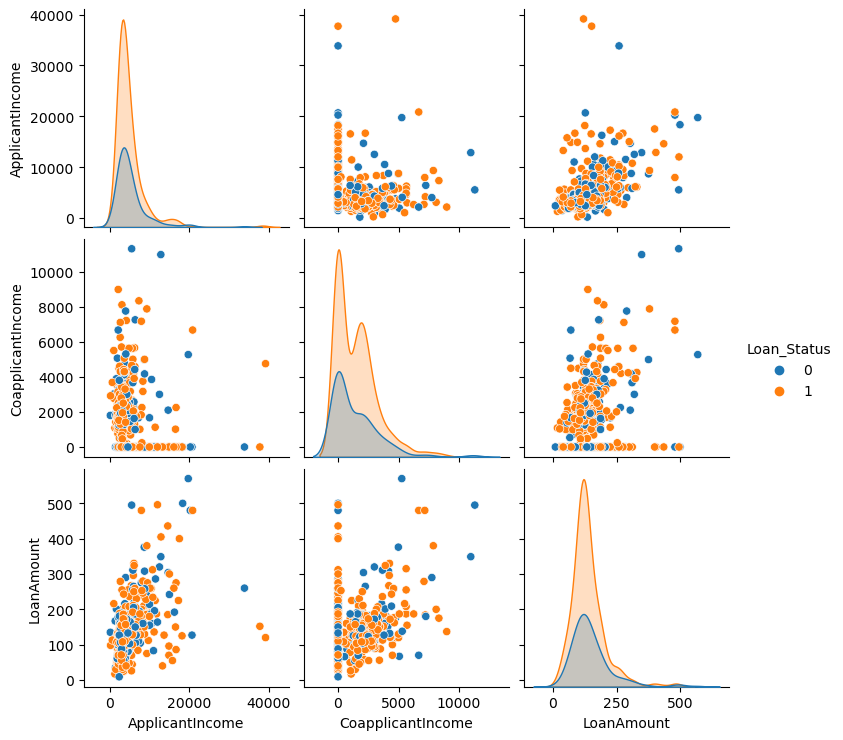

In [68]:
sns.pairplot(train_df2,hue = 'Loan_Status')

In [69]:
train_df.corr()['Loan_Status']

Married              0.092289
Dependents           0.021819
Self_Employed       -0.018685
ApplicantIncome     -0.031127
CoapplicantIncome    0.020732
LoanAmount          -0.069307
Loan_Amount_Term     0.009405
Credit_History       0.434905
Loan_Status          1.000000
Gender_Male          0.020161
Name: Loan_Status, dtype: float64

**Now, moving on to handling text data**
* As a machine learning model only understands numeric values, thus the text data or columns should be converted to some numeric equivalent. This is the reason all the yes and no were changed to 1, 0 and the column gender was also changed to numeric values.

In [70]:
train_df.replace({'Graduate' : 1,'Not Graduate' : 0},inplace = True)
train_df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0,0,1,0,5849,0.0,127.0,360.0,1,Urban,1,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0,1
2,1,0,1,1,3000,0.0,66.0,360.0,1,Urban,1,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1,Urban,1,1
4,0,0,1,0,6000,0.0,141.0,360.0,1,Urban,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1,Rural,1,0
610,1,3,1,0,4106,0.0,40.0,180.0,1,Rural,1,1
611,1,1,1,0,8072,240.0,253.0,360.0,1,Urban,1,1
612,1,2,1,0,7583,0.0,187.0,360.0,1,Urban,1,1


In [71]:
dummies1 = pd.get_dummies(train_df['Property_Area'],prefix = 'Property',drop_first=True)
train_df.drop('Property_Area',axis = 1,inplace = True)
train_df = pd.concat([train_df,dummies1],axis=1)
train_df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Property_Semiurban,Property_Urban
0,0,0,1,0,5849,0.0,127.0,360.0,1,1,1,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0
2,1,0,1,1,3000,0.0,66.0,360.0,1,1,1,0,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1,1,1,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1,1,0,0,0
610,1,3,1,0,4106,0.0,40.0,180.0,1,1,1,0,0
611,1,1,1,0,8072,240.0,253.0,360.0,1,1,1,0,1
612,1,2,1,0,7583,0.0,187.0,360.0,1,1,1,0,1


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Married             589 non-null    int64  
 1   Dependents          589 non-null    int64  
 2   Education           589 non-null    int64  
 3   Self_Employed       589 non-null    int64  
 4   ApplicantIncome     589 non-null    int64  
 5   CoapplicantIncome   589 non-null    float64
 6   LoanAmount          589 non-null    float64
 7   Loan_Amount_Term    589 non-null    float64
 8   Credit_History      589 non-null    int32  
 9   Loan_Status         589 non-null    int64  
 10  Gender_Male         589 non-null    uint8  
 11  Property_Semiurban  589 non-null    uint8  
 12  Property_Urban      589 non-null    uint8  
dtypes: float64(3), int32(1), int64(6), uint8(3)
memory usage: 50.0 KB


> All the columns are now numeric thus we can proceed with the next phase that is model selection.

## **Model Selection**

In [73]:
x = train_df.drop('Loan_Status',axis=1)
x

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Property_Semiurban,Property_Urban
0,0,0,1,0,5849,0.0,127.0,360.0,1,1,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0,0
2,1,0,1,1,3000,0.0,66.0,360.0,1,1,0,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1,1,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1,0,0,0
610,1,3,1,0,4106,0.0,40.0,180.0,1,1,0,0
611,1,1,1,0,8072,240.0,253.0,360.0,1,1,0,1
612,1,2,1,0,7583,0.0,187.0,360.0,1,1,0,1


In [74]:
y = train_df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 589, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [76]:
x_train.shape

(471, 12)

In [77]:
x_test.shape

(118, 12)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [79]:
def select_best_model(x,y):
    algos = {
        'KNN' : {
            'model' : KNeighborsClassifier(),
            'params' : {
                'n_neighbors' : [13,15],
                'weights' : ['uniform', 'distance']
            }
        },
        'Random_forest_classifier' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'n_estimators' : [150,250],
                'bootstrap' : [True,False]
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algos_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv)
        gs.fit(x,y)
        scores.append({
            'model' : algos_name,
            "best_params" :gs.best_params_,
            "best_score" : gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model', 'best_params', 'best_score'])
select_best_model(x,y)

,model,best_params,best_score
0,KNN,"{'n_neighbors': 15, 'weights': 'uniform'}",0.669492
1,Random_forest_classifier,"{'bootstrap': True, 'n_estimators': 250}",0.745763


**Now that we know random  forest classifier works better on the data, lets train the model.**

## **Model Training**

In [80]:
rf_clf = RandomForestClassifier(n_estimators=250)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250)

## **Model Testing**

In [81]:
y_pred = rf_clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [82]:
y_test

612    1
452    0
320    1
451    1
112    0
      ..
1      0
297    1
511    1
236    0
595    1
Name: Loan_Status, Length: 118, dtype: int64

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<Axes: >

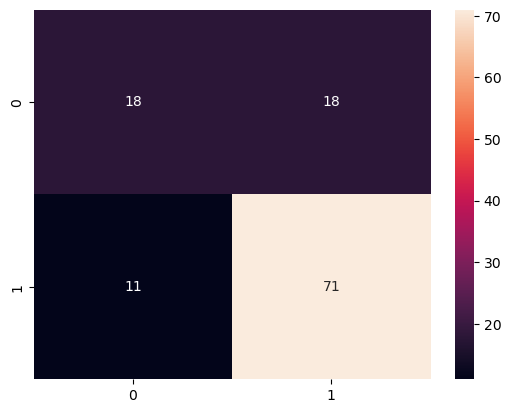

In [84]:
sns.heatmap(cm,annot=True)

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.2457627118644068

In [86]:
rf_clf.score(x_test,y_test)

0.7542372881355932

## Model Validation using Validation data

In [97]:
val_data = pd.read_csv("F:\Learning\Home loan approval\Data\loan_sanction_test.csv")

In [98]:
val_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [109]:
val_data['Credit_History'].unique()

array([ 1., nan,  0.])

In [99]:
val_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [100]:
val_data = val_data[val_data['Gender'].notna()]

In [101]:
val_data['Dependents'] = val_data['Dependents'].fillna('0')

In [102]:
val_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [103]:
val_data['Self_Employed'] = val_data['Self_Employed'].fillna('No')

In [104]:
val_data['LoanAmount'] = val_data['LoanAmount'].fillna(val_data['LoanAmount'].median())

In [105]:
val_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [106]:
val_data['Loan_Amount_Term'] = val_data['Loan_Amount_Term'].fillna(val_data['Loan_Amount_Term'].min())

In [110]:
val_data['Credit_History'] = val_data['Credit_History'].fillna(0)

In [111]:
val_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [112]:
for cat in category:
    print(f"{cat}::{val_data[cat].unique()}")

Education::['Graduate' 'Not Graduate']
Self_Employed::['No' 'Yes']
Gender::['Male' 'Female']
Married::['Yes' 'No']
Property_Area::['Urban' 'Semiurban' 'Rural']
Dependents::['0' '1' '2' '3+']
Credit_History::[1. 0.]
Loan_Amount_Term::[360. 240. 180.   6.  60. 480.  84.  12. 300. 350.  36. 120.]


In [113]:
val_data.replace({'Yes':1,'No':0},inplace=True)
val_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,1,2,Graduate,0,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban


In [114]:
val_data.replace({'Y':1,'N':0},inplace=True)
val_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,1,2,Graduate,0,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban


In [115]:
val_data.replace({'Graduate':1,'Not Graduate':0},inplace=True)
val_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,1,2,1,0,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,0,0,0,0,3276,0,78.0,360.0,1.0,Urban


In [116]:
val_dumm = pd.get_dummies(val_data['Gender'],prefix='Gender',drop_first=True)
val_data.drop('Gender',axis=1,inplace=True)
val_data = pd.concat([val_data,val_dumm],axis=1)
val_data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male
0,LP001015,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,1,2,1,0,2340,2546,100.0,360.0,0.0,Urban,1
4,LP001051,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,1


In [117]:
val_dumm1 = pd.get_dummies(val_data['Property_Area'],prefix='Property_Area',drop_first=True)
val_data.drop('Property_Area',axis=1,inplace=True)
val_data = pd.concat([val_data,val_dumm1],axis=1)
val_data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,0,1,0,5720,0,110.0,360.0,1.0,1,0,1
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1.0,1,0,1
2,LP001031,1,2,1,0,5000,1800,208.0,360.0,1.0,1,0,1
3,LP001035,1,2,1,0,2340,2546,100.0,360.0,0.0,1,0,1
4,LP001051,0,0,0,0,3276,0,78.0,360.0,1.0,1,0,1


In [119]:
val_data['Credit_History'] = val_data['Credit_History'].astype(int)
val_data['Credit_History'].dtype

dtype('int32')

In [120]:
val_data['Dependents'] = val_data['Dependents'].apply(chng_three)

In [121]:
val_data['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [123]:
val_data.head(10)

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,0,1,0,5720,0,110.0,360.0,1,1,0,1
1,LP001022,1,1,1,0,3076,1500,126.0,360.0,1,1,0,1
2,LP001031,1,2,1,0,5000,1800,208.0,360.0,1,1,0,1
3,LP001035,1,2,1,0,2340,2546,100.0,360.0,0,1,0,1
4,LP001051,0,0,0,0,3276,0,78.0,360.0,1,1,0,1
5,LP001054,1,0,0,1,2165,3422,152.0,360.0,1,1,0,1
6,LP001055,0,1,0,0,2226,0,59.0,360.0,1,0,1,0
7,LP001056,1,2,0,0,3881,0,147.0,360.0,0,1,0,0
8,LP001059,1,2,1,0,13633,0,280.0,240.0,1,1,0,1
9,LP001067,0,0,0,0,2400,2400,123.0,360.0,1,1,1,0


In [125]:
train_df.shape

(589, 13)

In [127]:
train_df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Property_Semiurban,Property_Urban
0,0,0,1,0,5849,0.0,127.0,360.0,1,1,1,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0
2,1,0,1,1,3000,0.0,66.0,360.0,1,1,1,0,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1,1,1,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1,1,1,0,1


In [126]:
val_data.shape

(356, 13)

In [128]:
val_data.drop('Loan_ID',axis=1,inplace=True)

In [129]:
val_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5720,0,110.0,360.0,1,1,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1,1,0,1
2,1,2,1,0,5000,1800,208.0,360.0,1,1,0,1
3,1,2,1,0,2340,2546,100.0,360.0,0,1,0,1
4,0,0,0,0,3276,0,78.0,360.0,1,1,0,1


In [130]:
val_data.shape

(356, 12)

In [133]:
val_data.rename(columns={'Property_Area_Semiurban':'Property_Semiurban','Property_Area_Urban':'Property_Urban'},inplace=True)

In [134]:
val_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Property_Semiurban,Property_Urban
0,1,0,1,0,5720,0,110.0,360.0,1,1,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1,1,0,1
2,1,2,1,0,5000,1800,208.0,360.0,1,1,0,1
3,1,2,1,0,2340,2546,100.0,360.0,0,1,0,1
4,0,0,0,0,3276,0,78.0,360.0,1,1,0,1


In [135]:
val_pred = rf_clf.predict(val_data)

In [137]:
val_data['Pred_Loan_Status'] = val_pred

In [138]:
val_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Property_Semiurban,Property_Urban,Pred_Loan_Status
0,1,0,1,0,5720,0,110.0,360.0,1,1,0,1,1
1,1,1,1,0,3076,1500,126.0,360.0,1,1,0,1,1
2,1,2,1,0,5000,1800,208.0,360.0,1,1,0,1,1
3,1,2,1,0,2340,2546,100.0,360.0,0,1,0,1,0
4,0,0,0,0,3276,0,78.0,360.0,1,1,0,1,0


**With this the Notebook comes to its conclusion, following are the conclusions:**
   1. The data had many null values. Thus, one by one all the null values were filled.
   2. There were some outliers in the data which was also handled.
   3. The model performed the best on random forest among the two tested. Giving the model an error of approx. 24% with some wrong predictions but all in all the model performed fine.
   4. Now, the accuracy can be increased or the error can be decreased by testing the data on some other algorithm and by doing some more hyperparameter tuning. But for now this is it.